# Basic statistics

Here, the goal is to get used to several concepts in basic statistics needed later on for Machine Learning.
We are going to generate a simple dataset ourselves and try to calculate some standard quantities to describe them.

First, let's import some standard libraries and generate the dataset.

In [1]:
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
rng = np.random.RandomState(0)
n_samples = 10000
cov = [[1,       0.7*1*1.3,   0.3*1.3*1],
       [0.7*1*1.3,    1.3**2,      0],
       [0.3*1.3*1,   0, 1.5**2]]
data = rng.multivariate_normal(mean=[1, -1, 0], cov=cov, size=n_samples)
data = pd.DataFrame(data, columns=["x1", "x2", "x3"])

First, make a scatter plot of this dataset using matplotlib to visualise what are the possible values of $x_1$, $x_2$ and $x_3$.
One can make a 2D plot of $x_1$ versus $x_2$, $x_2$ versus $x_3$ or $x_1$ versus $x_3$ to understand how they relate to one another.

Often this is cumbersome if one has too many variables to plot, but we are going to discuss methods to get around this later in the lecture.

One tip: one may use `plt.scatter` for every pair of variables to do this, or use the seaborn module to plot all pairs in one go. Look for documentation on `sns.pairplot`.

/home/daniloefl/miniconda3/envs/ml/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/daniloefl/miniconda3/envs/ml/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/daniloefl/miniconda3/envs/ml/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


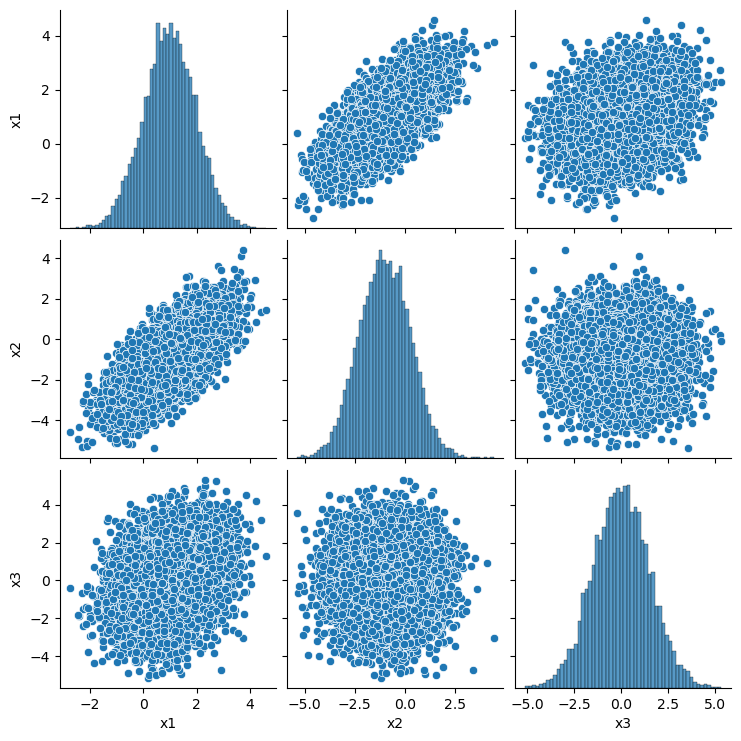

In [3]:
sns.pairplot(data)

What are the means and covariances of each variable?
Can you explain how they can be geometrically interpreted from the plots above?

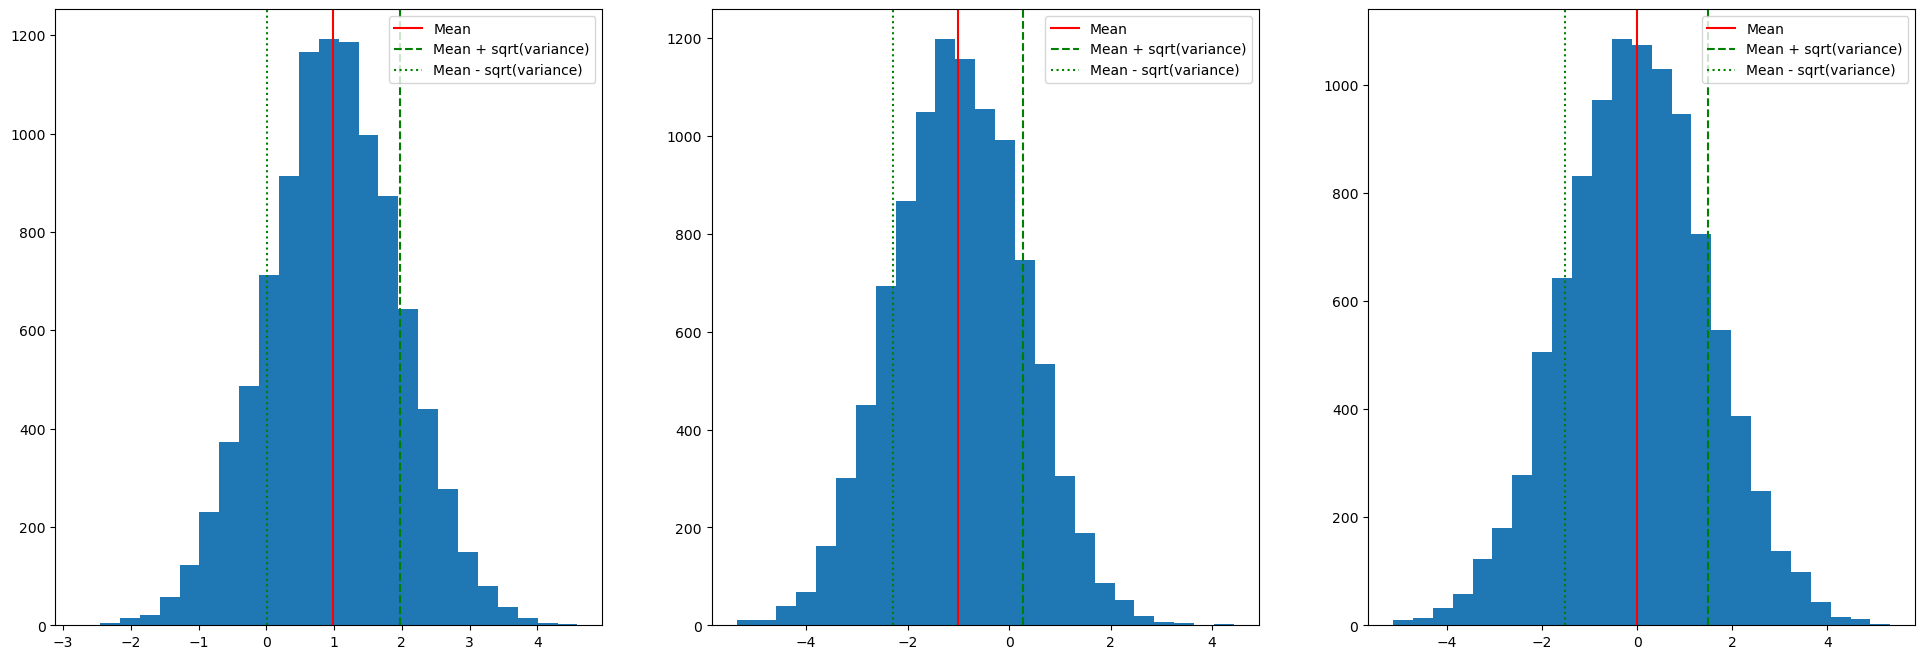

In [4]:
fig, ax = plt.subplots(figsize=(24, 8), ncols=3)
for i, x in enumerate(data.columns):
    mean = data.loc[:, x].mean()
    sigma = data.loc[:, x].std()
    m_plus = mean + sigma
    m_minus = mean - sigma
    ax[i].hist(data.loc[:, x], bins=25)
    ax[i].axvline(mean, c='r', ls='-', label="Mean")
    ax[i].axvline(m_plus, c='g', ls='--', label=r"Mean + sqrt(variance)")
    ax[i].axvline(m_minus, c='g', ls=':', label=r"Mean - sqrt(variance)")
    ax[i].legend()

In [5]:
full_cov = data.cov() # covariance matrix
full_corr = data.corr() # correlation coefficients
for i, x in enumerate(data.columns):
    for j, y in enumerate(data.columns):
        if j <= i:
            continue
        # we can recalculate the correlation coefficient from the covariance matrix
        rho = full_cov.loc[x, y]/np.sqrt(full_cov.loc[x, x]*full_cov.loc[y, y])
        print(f"Correlation[{x}, {y}] = {rho:.2f} (same as {full_corr.loc[x, y]:.2f})")

Correlation[x1, x2] = 0.69 (same as 0.69)
Correlation[x1, x3] = 0.27 (same as 0.27)
Correlation[x2, x3] = -0.00 (same as -0.00)


Slope between x1 and x2 = 1.48
Slope between x1 and x3 = 3.63
Slope between x2 and x3 = -142.59


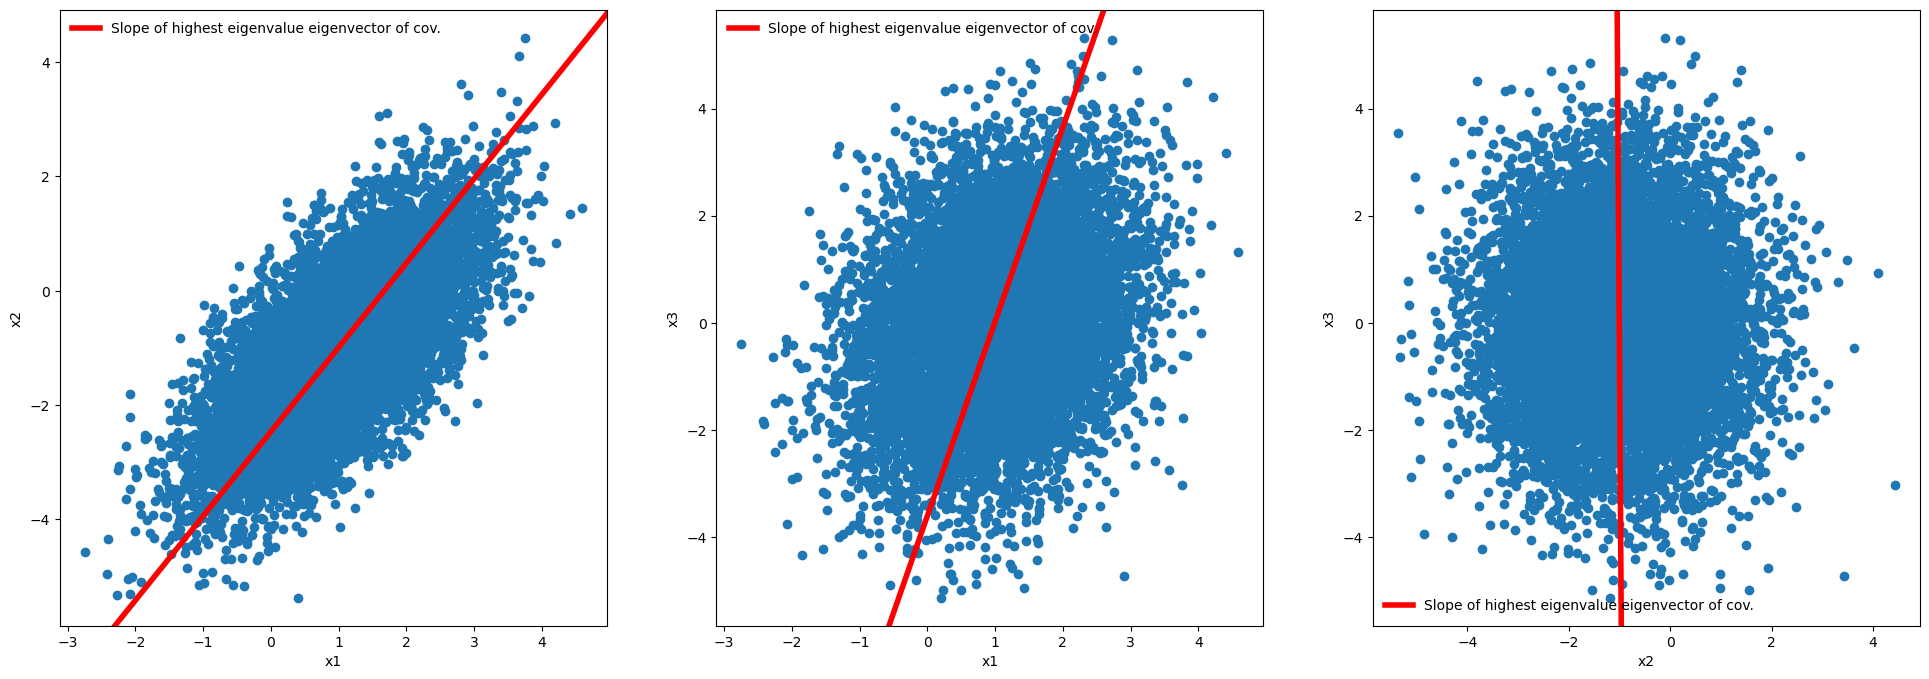

In [6]:
fig, ax = plt.subplots(figsize=(24, 8), ncols=3)
count = 0
for i, x in enumerate(data.columns):
    for j, y in enumerate(data.columns):
        if j <= i:
            continue
        # get the data for the x and y axis
        dx = data.loc[:, x]
        dy = data.loc[:, y]
        
        # find their means, so we can draw a line passing through that point
        mi = dx.mean()
        mj = dy.mean()

        # calculate the covariance matrix
        cov = np.cov(dx, dy)

        # find the eigenvectors of cov:
        eigvals, eigvec = np.linalg.eigh(cov)
        # find the index of the highest eigenvalue
        i_max = np.argmax(np.fabs(eigvals))
        # find the slope of the eigenvector corresponding to the highest eigenvalue:
        slope = eigvec[1, i_max]/eigvec[0, i_max]
        # note: this procedure
        # sheds light into an interesting and useful interpretation of the covariance matrix
        print(f"Slope between {x} and {y} = {slope:.2f}")
        # plot the data
        ax[count].scatter(dx, dy)
        # plot a line with the slope above passing through the mean
        ax[count].axline((mi, mj), slope=slope,
                         label=f"Slope of highest eigenvalue eigenvector of cov.",
                         c="r", ls="-", lw=4)
        ax[count].set(xlabel=x, ylabel=y)
        ax[count].legend(frameon=False)
        count += 1

Now let's try "standardizing" the data and looking at the correlation coefficients:

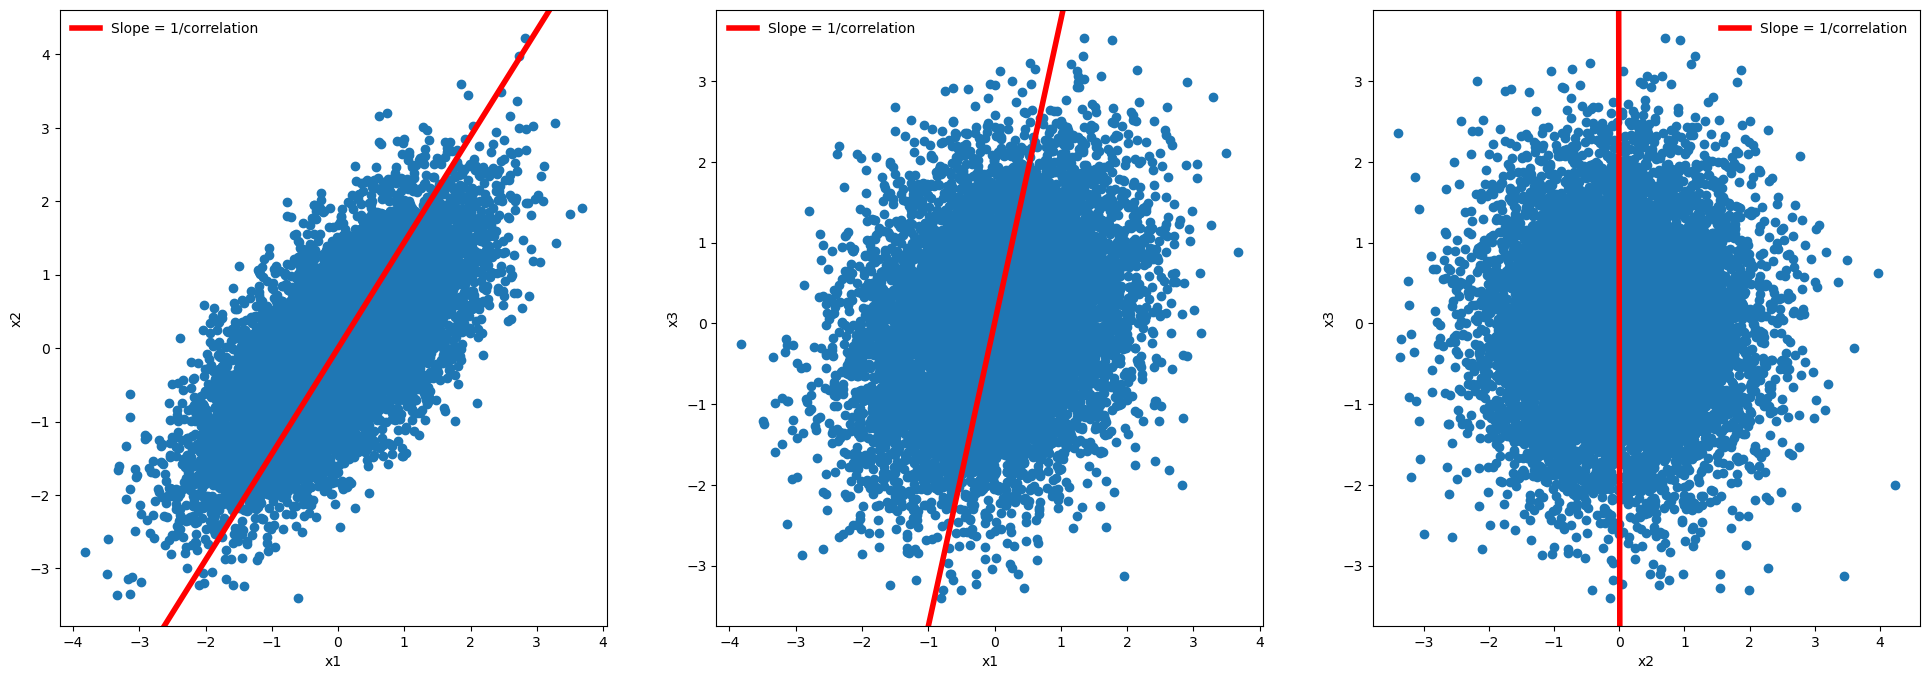

In [7]:
fig, ax = plt.subplots(figsize=(24, 8), ncols=3)
count = 0
for i, x in enumerate(data.columns):
    for j, y in enumerate(data.columns):
        if j <= i:
            continue
        # get the data for the x and y axis
        dx = data.loc[:, x]
        dy = data.loc[:, y]
        # find their means
        mi = dx.mean()
        mj = dy.mean()
        # find the square root of their variances
        si = dx.std()
        sj = dy.std()
        # standardize them:
        di = (dx-mi)/si
        dj = (dy-mj)/sj
        # plot them again
        ax[count].scatter(di, dj)
        # what is the correlation coefficient?
        rho = np.corrcoef(di, dj)[0, 1]
        # plot a line with the slope above passing through the mean
        ax[count].axline((0, 0), slope=1/rho,
                         label=f"Slope = 1/correlation",
                         c="r", ls="-", lw=4)
        ax[count].set(xlabel=x, ylabel=y)
        ax[count].legend(frameon=False)
        count += 1